# First attempt Project Sigmoid
### Healthcare Diabetes
_project started: 02.08.2024_


> I don't have any idea how should i do this. 

#### Thinkinig process

Task: **To train a model that will be able to predict Diabetes**
A simple google search and wikipedia gives this:
[Diabetes](https://www.wikiwand.com/en/Diabetes)
    
> Diabetes mellitus, often known simply as diabetes, is a group of common endocrine diseases characterized by sustained high blood sugar levels. Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body becoming unresponsive to the hormone's effects. Classic symptoms include thirst, polyuria, weight loss, and blurred vision. If left untreated, the disease can lead to various health complications, including disorders of the cardiovascular system, eye, kidney, and nerves.

some characteristics:
- endocrine diseases
- high blood sugar
- not producing enough insulin
- cells of the body becoming unresponsive to insuline

symptoms:
- thirst
- polyuria (peeing a lot >=2.5L a day)
- weight loss
- blurred vision

consequences:
- cardiovascular system disorders
- eye
- kidney
- nerves

The goal is to find a direct correlation between some data set and the probility of having diabets

###### Provided Data
1. Id: Unique identifier for each data entry.
2. Pregnancies: Number of times pregnant.
3. Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
4. BloodPressure: Diastolic blood pressure (mm Hg).
5. SkinThickness: Triceps skinfold thickness (mm).
6. Insulin: 2-Hour serum insulin (mu U/ml).
7. BMI: Body mass index (weight in kg / height in m^2).
8. DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
9. Age: Age in years.
10. Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.

###### Analyzing dataset:
1. id - don't influence on final result (should not be included in training data)
2. pregnancie

> Does somehow pregnancy disturb endocrine system ?
> Yes it does.

  [nursingtimes.net](https://www.nursingtimes.net/clinical-archive/womens-health/pregnancy-5-effects-on-the-endocrine-nervous-and-reproductive-systems-02-01-2024/)
  > Gestational diabetes (GD)
  > GD is a transitory condition characterised by chronic hyperglycaemia in pregnancy, which usually resolves following delivery. In the UK, GD reportedly affects around 1 in 20 pregnancies, with major risk factors including being overweight/obese, having GD or a large baby (4.5kg/10lb or more) in a previous pregnancy, being of Black or African Caribbean, Asian or Middle Eastern heritage and increasing age (Diabetes UK, nda).

conclusion pregnancie could be a factor

3. glucose (its intuitive)
4. bloodpresure
   > Does diabetes influence bloodpreasure?
   > Yes it does.

   [www.nyp.org](https://www.nyp.org/diabetes-and-endocrinology/diabetes-resource-center/diabetes-and-hypertension)
   >Diabetes causes damage by scarring the kidneys, which in turn leads to salt and water retention, which in turn raises blood pressure.
5. skin thickness
   > Does diabetes influence skinthickness ?
   > Yes it does.

    [www.researchgate.net](https://www.researchgate.net/publication/343418223_Skin_Thickness_can_Predict_the_Progress_of_Diabetes_Type_2_A_New_Medical_Hypothesis)
   > Diabetes mellitus induces alterations in the metabolism of the macromolecules present in the intercellular matrices and particularly in the basement membranes. These contribute to the morphological changes characteristic of the disease : basement membrane thickening, skin thickening and induration.
6. insulin (its intuitive)
7. body mass (its intuitive)
8. DiabetesPedigreeFunction (i guess its have a importance :) )
9. Age
    > ages also correlate with the presence of diabetes
   [www.researchgate.net](https://www.researchgate.net/figure/Prevalence-of-diabetes-specified-by-age-groups-and-sex_fig1_280707224)
    
   ![correlation of age and diabetes](https://www.researchgate.net/profile/Kamal-Gholipour/publication/280707224/figure/fig1/AS:284502246084613@1444842029705/Prevalence-of-diabetes-specified-by-age-groups-and-sex.png)

10. and the result

> to be hones i don't have any idea of how to do that.
> I asume this is a classification problem.
> I also don't know what 

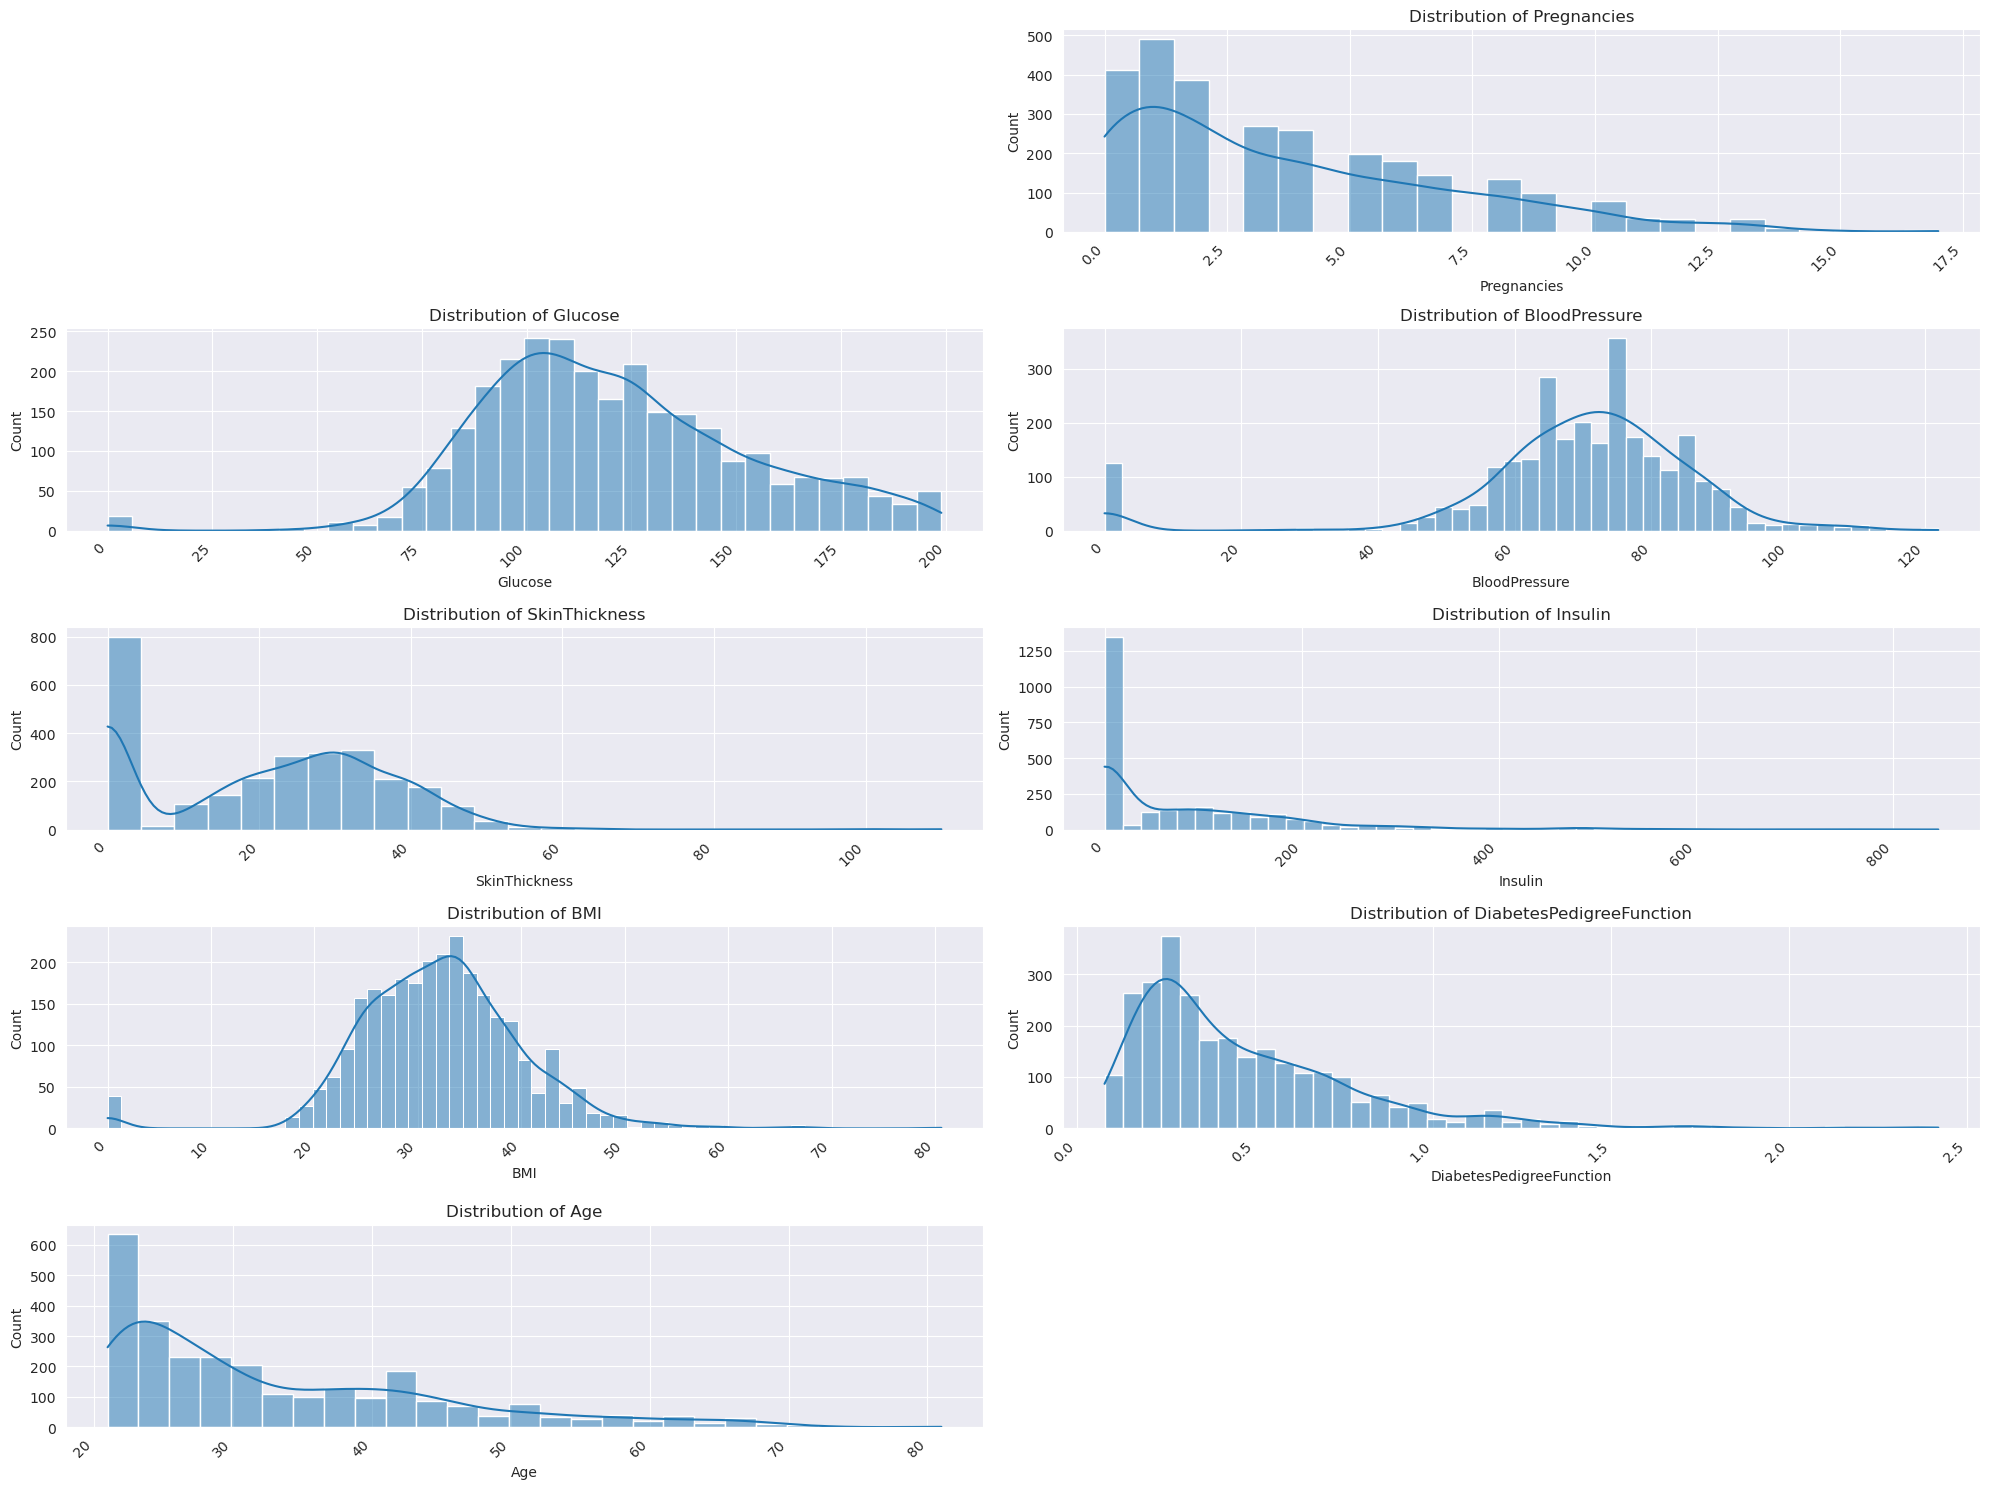

In [1]:

#Load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn

data = pd.read_csv("Healthcare-Diabetes.csv")

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create a grid of subplots
num_cols = len(data.columns)
num_rows = (num_cols + 1) // 2  # Ceiling division to get number of rows

# Loop through each column and create a subplot
for i, column in enumerate(data.columns):
    if i == 0 or i == 9 : continue
    plt.subplot(num_rows, 2, i+1)
    
    if data[column].dtype in ['int64', 'float64']:
        # For numerical columns, use a histogram
        sns.histplot(data[column], kde=True)
    else:
        # For categorical columns (including the target variable), use a bar plot
        sns.countplot(x=column, data=data)
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # Rotate x-axis labels if they're too long
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [2]:
import  numpy as np
numpy_array = data.to_numpy(dtype='float')
numpy_array = np.delete(numpy_array, 0, axis=1)
print(numpy_array)
print(numpy_array.size)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  6.     85.     78.    ...   0.382  42.      0.   ]
 [  0.    129.    110.    ...   0.319  26.      1.   ]
 [  2.     81.     72.    ...   0.547  25.      0.   ]]
24912


In [3]:
import torch
from torch.utils.data import Dataset
# define datatsets

class DiabetesDataset(Dataset):
    TRAINING = 0.8
    TESTING = 1 - TRAINING
    
    def __init__(self, csv_location, train=True, transform=None, target_transform=None):
        self.csv = pd.read_csv(csv_location)
        self.data = self.csv.to_numpy(dtype="float32")
        self.data = np.delete(self.data, 0, axis=1) # delete first column 

        # spliting data for training
        size = len(self.data)
        if train is True:
            self.data, _ = np.split(self.data ,[int(self.TRAINING * size)])
        else :
            _, self.data = np.split(self.data, [int(self.TRAINING * size)])
        
        self.data = torch.from_numpy(self.data)
        self.data = self.data.float()
        self.transform = transform
        self.target_transform = target_transform
        self.train = train
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data[idx]
        label = item[-1].item();
        
        item = item[:-1]
        if self.transform:
            item = self.transform(item)
        
        if self.target_transform:
            label = self.target_transform(label)
            
    
        return item, label

In [8]:
from torch.utils.data import DataLoader

learning_rate = 1e-7
batch_size = 10
epochs = 10

# i probably don't need to transform anything
target_transform = lambda y: torch.zeros(2, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y, dtype=torch.int64), value=1)

training_data = DiabetesDataset(csv_location="Healthcare-Diabetes.csv", train=True, target_transform=target_transform)
test_data = DiabetesDataset(csv_location="Healthcare-Diabetes.csv", train=False, target_transform=target_transform)


train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [5]:
# Define Network Layer

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # I don't know what I am doing
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(8, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )
        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(model)
    

Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=2, bias=True)
  )
)


In [16]:
# train_dataloader.

SyntaxError: invalid syntax (222569902.py, line 1)

In [6]:


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    
        if batch % 10 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # print(y.shape)
            # print(pred.shape)
            correct += (pred.argmax(0) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {100*correct:>0.1f}%, Avg Loss: {test_loss:>8f}\n")

In [10]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}/{epochs}\n -----------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Finished Training")

Epoch 1/10
 -----------------------------------
loss: 8.797338  [   10/ 2214]
loss: 7.158714  [  110/ 2214]
loss: 6.963486  [  210/ 2214]
loss: 11.660833  [  310/ 2214]
loss: 4.944973  [  410/ 2214]
loss: 14.243576  [  510/ 2214]
loss: 2.211087  [  610/ 2214]
loss: 22.267868  [  710/ 2214]
loss: 12.111346  [  810/ 2214]
loss: 6.417303  [  910/ 2214]
loss: 3.672306  [ 1010/ 2214]
loss: 18.775593  [ 1110/ 2214]
loss: 13.349657  [ 1210/ 2214]
loss: 7.028614  [ 1310/ 2214]
loss: 13.580953  [ 1410/ 2214]
loss: 6.074813  [ 1510/ 2214]
loss: 35.862770  [ 1610/ 2214]
loss: 6.707427  [ 1710/ 2214]
loss: 12.279807  [ 1810/ 2214]
loss: 5.979992  [ 1910/ 2214]
loss: 31.765539  [ 2010/ 2214]
loss: 3.270161  [ 2110/ 2214]
loss: 10.382858  [ 2210/ 2214]
Test Error: 
 Accuracy: 16.1%, Avg Loss: 12.314205

Epoch 2/10
 -----------------------------------
loss: 27.191601  [   10/ 2214]
loss: 9.881445  [  110/ 2214]
loss: 8.176177  [  210/ 2214]
loss: 5.317239  [  310/ 2214]
loss: 5.797806  [  410/ 2214]
